In [35]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Baixar os dados do OpenML
boston = fetch_openml(name="boston", version=1, as_frame=True)

# Extrair as features (dados de entrada) e o alvo (preço das casas)
dados = boston.data.to_numpy()
alvo = boston.target.to_numpy()

# Conferir formatos
print("Formato dos dados (X):", dados.shape)
print("Formato do alvo (y):", alvo.shape)

Formato dos dados (X): (506, 13)
Formato do alvo (y): (506,)


Gráfico 0


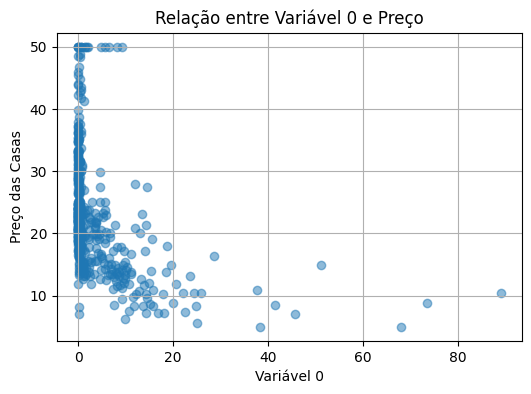

Gráfico 1


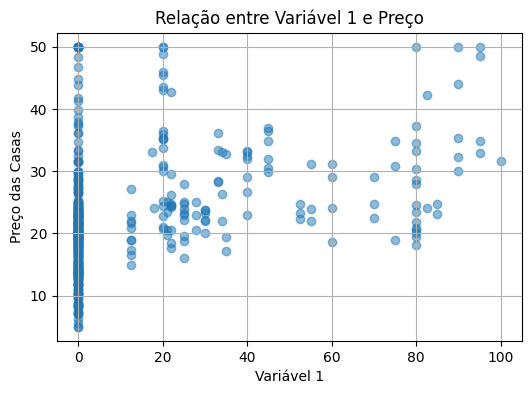

Gráfico 2


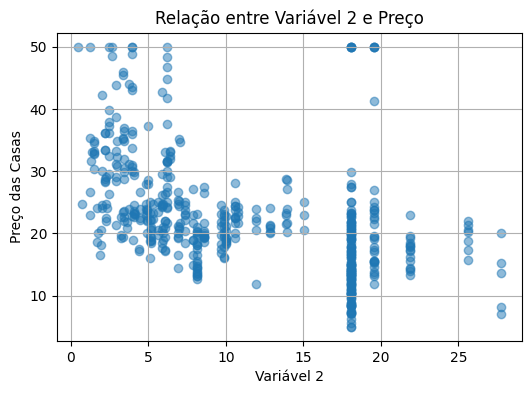

Gráfico 3


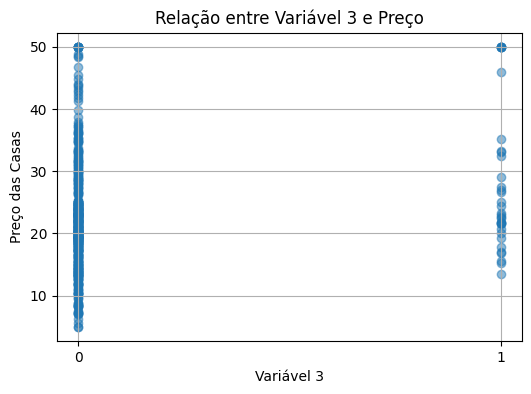

Gráfico 4


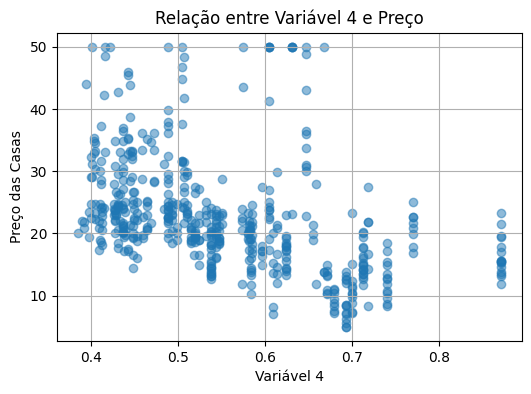

Gráfico 5


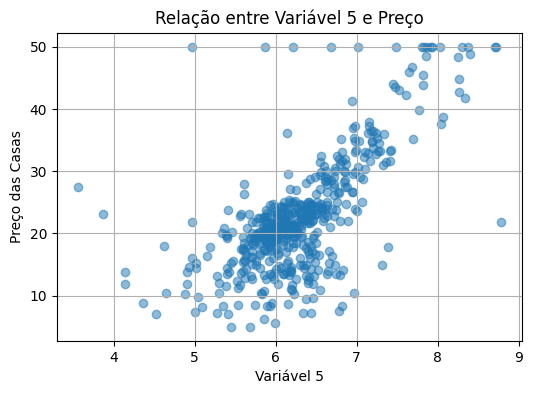

Gráfico 6


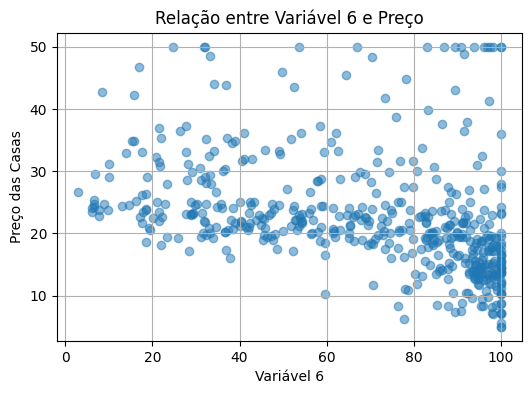

Gráfico 7


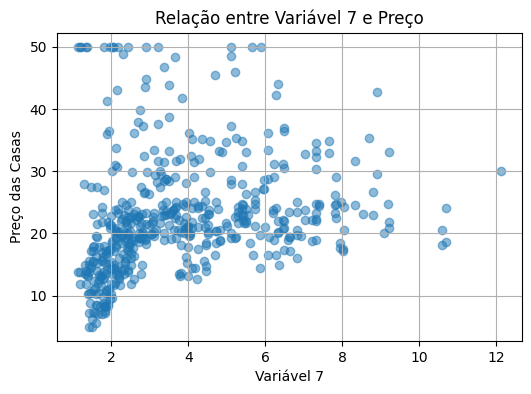

Gráfico 8


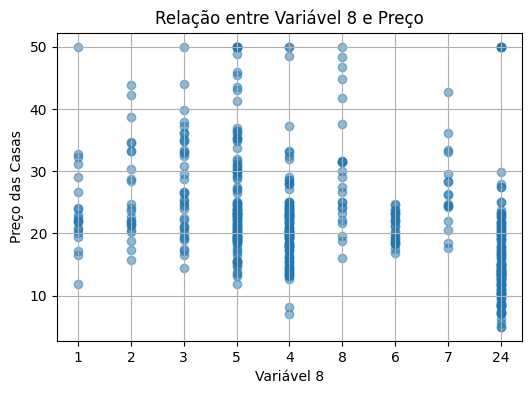

Gráfico 9


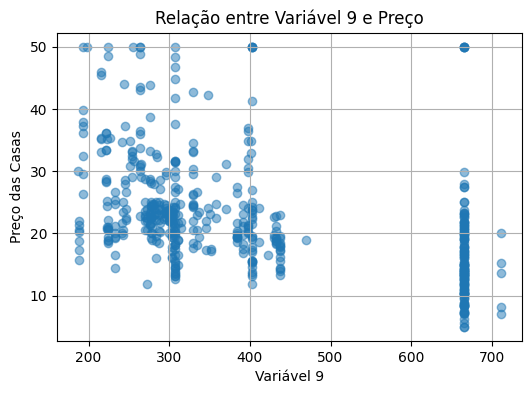

Gráfico 10


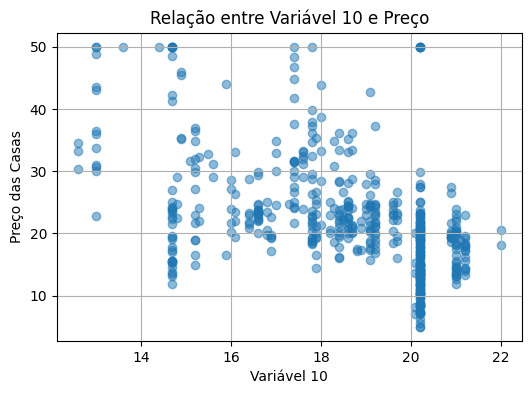

Gráfico 11


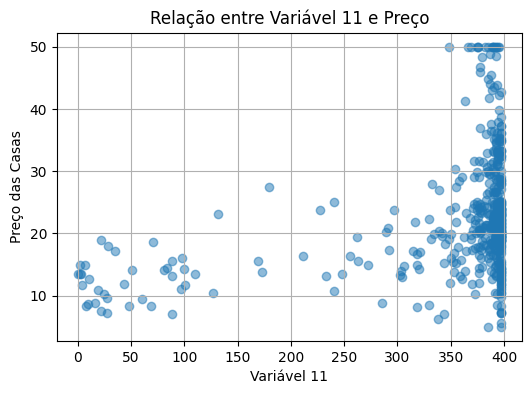

Gráfico 12


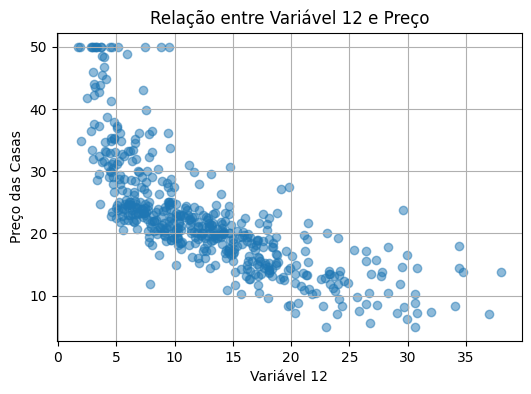

In [36]:
import matplotlib.pyplot as plt

# Percorrer todas as colunas dos dados e gerar um gráfico de dispersão para cada uma
for indice, coluna in enumerate(dados.T):  # Transpõe para iterar por colunas
    print(f"Gráfico {indice}")  # Exibe o índice da variável

    plt.figure(figsize=(6, 4))  # Define o tamanho do gráfico
    plt.scatter(coluna, alvo, alpha=0.5)  # Gráfico de dispersão com transparência
    plt.xlabel(f"Variável {indice}")  # Nome do eixo X
    plt.ylabel("Preço das Casas")  # Nome do eixo Y
    plt.title(f"Relação entre Variável {indice} e Preço")  # Título do gráfico
    plt.grid(True)  # Adiciona grade ao gráfico
    plt.show()  # Exibe o gráfico


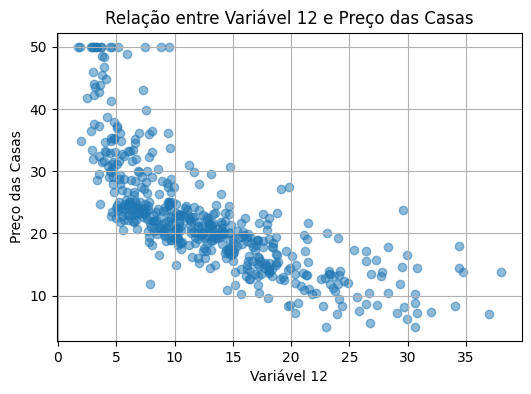

Descrição da coluna LSTAT: LSTAT    % lower status of the population


In [37]:
# Selecionar a variável da coluna 12 e garantir que seja um vetor 1D
variavel_12 = dados[:, 12].ravel()  # Equivalente a X[:, 12:13], mas convertido para 1D

# Criar gráfico de dispersão
plt.figure(figsize=(6, 4))  # Define o tamanho do gráfico
plt.scatter(variavel_12, alvo, alpha=0.5)  # Adiciona transparência para melhor visualização
plt.xlabel("Variável 12")  # Nome do eixo X
plt.ylabel("Preço das Casas")  # Nome do eixo Y
plt.title("Relação entre Variável 12 e Preço das Casas")  # Título do gráfico
plt.grid(True)  # Adiciona grade para facilitar a leitura

# Exibir o gráfico
plt.show()

# Descrição específica da variável LSTAT
descricao_lstat = [linha for linha in boston.DESCR.split("\n") if "LSTAT" in linha]
print("Descrição da coluna LSTAT:", descricao_lstat[0])


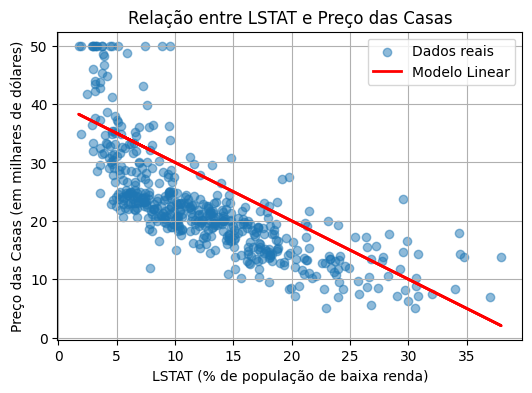

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Definir o modelo linear
def modelo_linear(entrada, a, b):
    """Aplica a equação de uma reta: y = a*X + b"""
    return a * entrada + b  # Retorna diretamente o resultado

# Selecionar a variável LSTAT (coluna 12) e converter para 1D
variavel_lstat = dados[:, 12].ravel()

# Definir os parâmetros do modelo linear
a, b = -1, 40  # Inclinação e intercepto arbitrários

# Gerar previsões do modelo linear
valores_preditos = modelo_linear(variavel_lstat, a, b)

# Criar gráfico de dispersão + reta do modelo
plt.figure(figsize=(6, 4))
plt.scatter(variavel_lstat, alvo, alpha=0.5, label="Dados reais")  # Pontos reais
plt.plot(variavel_lstat, valores_preditos, 'r', linewidth=2, label="Modelo Linear")  # Linha de regressão

# Configurações do gráfico
plt.xlabel("LSTAT (% de população de baixa renda)")
plt.ylabel("Preço das Casas (em milhares de dólares)")
plt.title("Relação entre LSTAT e Preço das Casas")
plt.legend()  # Adiciona legenda para facilitar a interpretação
plt.grid(True)  # Adiciona grade ao gráfico

# Exibir o gráfico
plt.show()


In [39]:
import numpy as np

# Definir a função do Erro Médio Absoluto (MAE)
def mae(alvo, valores_preditos):
    """Calcula o Erro Médio Absoluto (MAE) entre os valores reais e previstos."""
    erro_absoluto = np.abs(valores_preditos - alvo)  # Diferença absoluta
    return np.mean(erro_absoluto)  # Média dos erros absolutos

# Gerar previsões do modelo linear
valores_preditos = modelo_linear(variavel_lstat, -1, 40)

# Calcular e exibir o MAE
erro_mae = mae(alvo, valores_preditos)
print(f"Erro Médio Absoluto (MAE): {erro_mae:.2f}")

Erro Médio Absoluto (MAE): 6.97


In [43]:
import numpy as np

# Função para calcular o Erro Quadrático Médio (MSE)
def mse(alvo, valores_preditos):
    diferenca = valores_preditos - alvo.reshape(-1, 1)
    diferenca_quadrada = diferenca ** 2
    soma_erro = np.sum(diferenca_quadrada)
    mse_valor = float(soma_erro / len(diferenca_quadrada))  # Calcula o erro médio quadrático (MSE)

    return mse_valor  # Retorna um número escalar

# Gerar previsões do modelo linear
valores_preditos = modelo_linear(variavel_lstat, -1, 40)  # Usando a variável correta

# Calcular o MSE
erro_mse = mse(alvo, valores_preditos)  # Usando "alvo" no lugar de "y"
print(f"Erro Quadrático Médio (MSE): {erro_mse:.2f}")


Erro Quadrático Médio (MSE): 61.79


In [45]:
from math import sqrt
import numpy as np

# Função para calcular a Raiz do Erro Quadrático Médio (RMSE)
def rmse(alvo, valores_preditos):
    diferenca = valores_preditos - alvo.reshape(-1, 1)  # Ajuste para manter compatibilidade com NumPy
    diferenca_quadrada = diferenca ** 2  # Eleva ao quadrado os erros individuais
    soma_erro = np.sum(diferenca_quadrada)  # Soma dos erros quadráticos
    mse = soma_erro / len(diferenca_quadrada)  # Calcula o erro médio quadrático (MSE)

    return sqrt(mse)  # Retorna a raiz quadrada do MSE (RMSE)

# Selecionar a variável LSTAT (coluna 12)
variavel_lstat = dados[:, 12:13]  # Mantendo o formato correto (coluna 12)

# Gerar previsões do modelo linear
valores_preditos = modelo_linear(variavel_lstat, -1, 40)  # Usando a variável correta

# Calcular o RMSE
erro_rmse = rmse(alvo, valores_preditos)  # Usando "alvo" no lugar de "y"
print(f"Raiz do Erro Quadrático Médio (RMSE): {erro_rmse:.2f}")


Raiz do Erro Quadrático Médio (RMSE): 7.86


In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Função para calcular a Raiz do Erro Quadrático Médio (RMSE)
def rmse(alvo, valores_preditos):
    mse = mean_squared_error(alvo, valores_preditos)  # Calcula o erro médio quadrático (MSE)
    return sqrt(mse)  # Retorna a raiz quadrada do MSE (RMSE)

# Selecionar a variável LSTAT (coluna 12)
variavel_lstat = dados[:, 12:13]

# Gerar previsões do modelo linear
valores_preditos = modelo_linear(variavel_lstat, -1, 40)

# Calcular o RMSE
erro_rmse = rmse(alvo, valores_preditos)  # Usando "alvo" no lugar de "y"
print(f"Raiz do Erro Quadrático Médio (RMSE): {erro_rmse:.2f}")


Raiz do Erro Quadrático Médio (RMSE): 7.86


RMSE antes do ajuste: 24.33
RMSE após o ajuste: 6.20


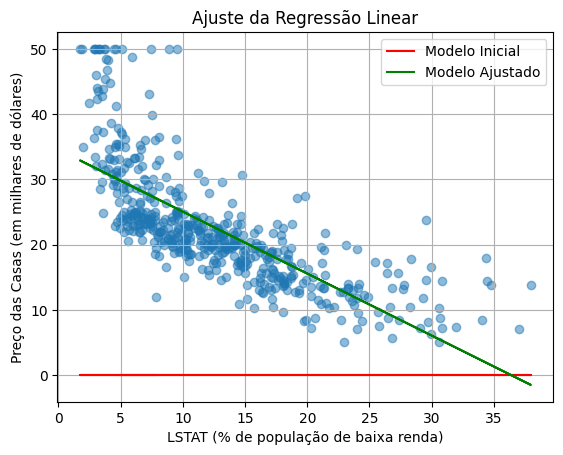

(-0.9500317226790728, 34.55355094057261)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

# Classe de Regressão Linear com Gradiente Descendente
class RegressaoLinear():
    def __init__(self):
        self.a = 0  # Inicializa o coeficiente angular
        self.b = 0  # Inicializa o intercepto

    def fit(self, X, y, taxa_aprendizado=0.1, iteracoes=500):
        X = X.ravel()  # Garante que X seja um vetor 1D
        y = y.ravel()  # Garante que y seja um vetor 1D

        for _ in range(iteracoes):
            y_pred = self.predict(X)  # Faz a previsão com os valores atuais de a e b
            erro = y_pred - y  # Calcula o erro residual

            # Ajuste dos coeficientes via Gradiente Descendente
            ajusteB = np.sum(erro) / len(y)
            self.b -= taxa_aprendizado * ajusteB

            ajusteA = np.sum(erro * X) / np.sum(X)
            self.a -= taxa_aprendizado * ajusteA

    def predict(self, X):
        """ Retorna as previsões do modelo """
        return self.a * X + self.b

# Criar gráfico de dispersão
plt.scatter(variavel_lstat, alvo, alpha=0.5)

# Instanciar o modelo de regressão
modelo = RegressaoLinear()

# Fazer a previsão inicial (antes do treinamento)
valores_preditos = modelo.predict(variavel_lstat)
print(f"RMSE antes do ajuste: {rmse(alvo, valores_preditos):.2f}")
plt.plot(variavel_lstat, valores_preditos, 'r', label="Modelo Inicial")

# Treinar o modelo
modelo.fit(variavel_lstat, alvo)

# Fazer a previsão após o treinamento
valores_preditos = modelo.predict(variavel_lstat)
print(f"RMSE após o ajuste: {rmse(alvo, valores_preditos):.2f}")
plt.plot(variavel_lstat, valores_preditos, 'g', label="Modelo Ajustado")

# Exibir o gráfico
plt.xlabel("LSTAT (% de população de baixa renda)")
plt.ylabel("Preço das Casas (em milhares de dólares)")
plt.title("Ajuste da Regressão Linear")
plt.legend()
plt.grid(True)
plt.show()

# Exibir os coeficientes ajustados
modelo.a, modelo.b


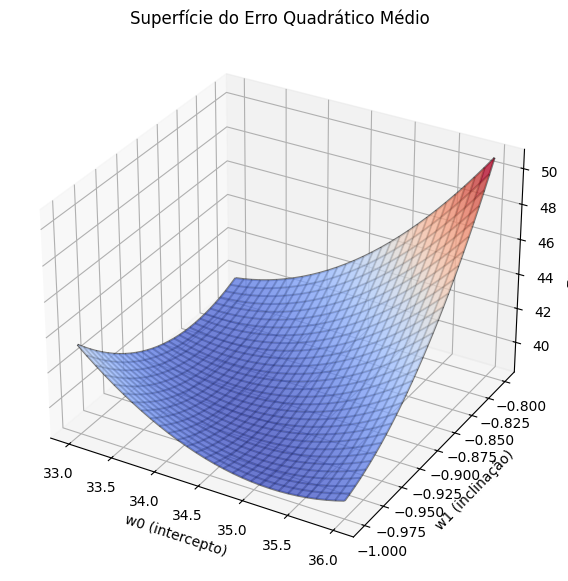

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

# Criar uma grade de valores para w0 (intercepto) e w1 (inclinação)
w0 = np.linspace(33, 36, 30)
w1 = np.linspace(-1, -0.8, 30)

# Função para calcular o erro MSE para cada combinação de w0 e w1
def z_function(W0, W1):
    modelo = RegressaoLinear()
    modelo.w = np.zeros((2,1), dtype=np.float64)
    Erro = np.empty(W0.shape, dtype=np.float64)

    # Percorre todas as combinações de W0 e W1
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0, 0] = W0[j, k]
            modelo.w[1, 0] = W1[j, k]
            y_pred = modelo.predict(variavel_lstat)
            mse = mean_squared_error(alvo, y_pred)
            Erro[j, k] = mse

    return Erro  # Retorna a matriz de erros

# Criar a grade de valores para w0 e w1
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

# Criar a figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Adicionar wireframe e surface plot para visualizar o erro MSE
ax.plot_wireframe(W0, W1, Erro, color="black", alpha=0.5)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, cmap="coolwarm", edgecolor="none", alpha=0.75)

# Configurações do gráfico
ax.set_xlabel("w0 (intercepto)")
ax.set_ylabel("w1 (inclinação)")
ax.set_zlabel("Erro MSE")
ax.set_title("Superfície do Erro Quadrático Médio")

# Exibir o gráfico
plt.show()


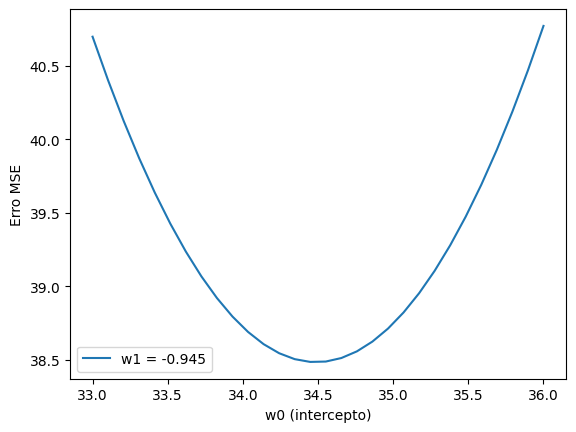

In [60]:
# Configurar rótulos do gráfico
plt.ylabel("Erro MSE")
plt.xlabel("w0 (intercepto)")

# Definir índice para análise
i = 8
# Plotar erro MSE em função do intercepto w0 para um w1 fixo
plt.plot(W0[i, :], Erro[i, :], label=f"w1 = {W1[i, 0]:.3f}")

# Adicionar legenda e exibir o gráfico
plt.legend()
plt.show()


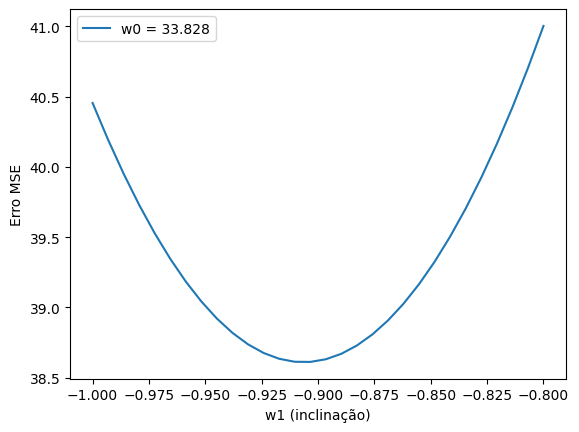

In [61]:
# Configurar rótulos do gráfico
plt.ylabel("Erro MSE")
plt.xlabel("w1 (inclinação)")

# Definir índice para análise
i = 8  # Índice correspondente a uma coluna de W1

# Plotar erro MSE em função da inclinação w1 para um w0 fixo
plt.plot(W1[:, i], Erro[:, i], label=f"w0 = {W0[0, i]:.3f}")

# Adicionar legenda e exibir o gráfico
plt.legend()
plt.show()


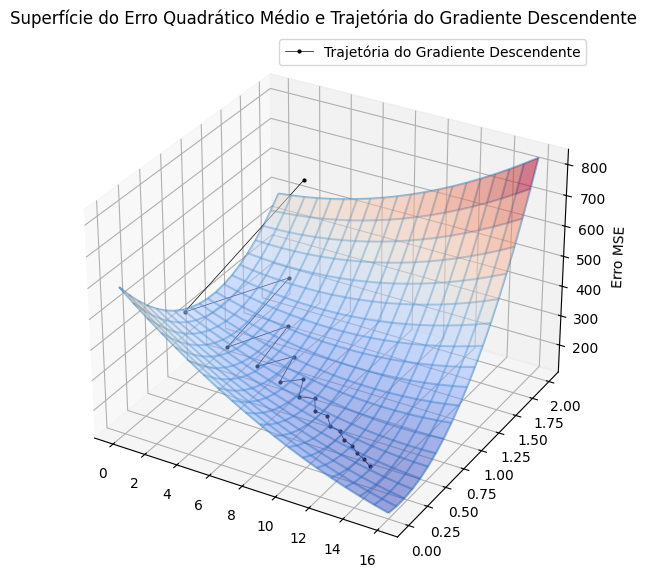

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D  # Importação necessária para gráficos 3D

class RegressaoLinear():
    def __init__(self):
        """Inicializa os coeficientes (pesos) do modelo."""
        self.w = np.zeros((2, 1), dtype=np.float64)  # Inicializa w0 e w1
        self.wh = []  # Lista para armazenar a trajetória dos pesos e do erro MSE

    @staticmethod
    def addBias(X):
        """ Adiciona um termo de bias (coluna de 1s) à matriz X. """
        bias = np.ones((X.shape[0], 1), dtype=np.float64)
        X_b = np.concatenate((bias, X), axis=1)
        return X_b

    def fit(self, X, y, taxa_aprendizado=0.1, iteracoes=20):
        X_b = self.addBias(X)
        y = y.reshape(-1, 1)

        for _ in range(iteracoes):
            y_pred = self.predict(X)
            erro = y_pred - y

            # Atualiza os coeficientes (Gradiente Descendente)
            ajuste = X_b.T.dot(erro) / np.sum(X_b, axis=0, keepdims=True).T
            self.w -= taxa_aprendizado * ajuste

            # Armazena a evolução dos coeficientes e do erro MSE
            mse = mean_squared_error(y, y_pred)
            self.wh.append([self.w[0, 0], self.w[1, 0], mse])

    def predict(self, X):
        """ Retorna as previsões do modelo. """
        X_b = self.addBias(X)
        return X_b.dot(self.w)

# Criar uma grade de valores para w0 (intercepto) e w1 (inclinação)
w0 = np.linspace(0, 16, 20)
w1 = np.linspace(0, 2, 20)

# Função para calcular o erro MSE para cada combinação de w0 e w1
def z_function(W0, W1):
    modelo = RegressaoLinear()
    Erro = np.empty(W0.shape, dtype=np.float64)

    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0, 0] = W0[j, k]
            modelo.w[1, 0] = W1[j, k]
            y_pred = modelo.predict(variavel_lstat)
            mse = mean_squared_error(alvo, y_pred)
            Erro[j, k] = mse

    return Erro  # Retorna a matriz de erros

# Criar a grade de valores para w0 e w1
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)  # Calcula os erros MSE

# Criar a figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Adicionar wireframe e surface plot para visualizar o erro MSE
ax.plot_wireframe(W0, W1, Erro, alpha=0.5)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, cmap="coolwarm", edgecolor="none", alpha=0.5)

# Treinar o modelo e armazenar a trajetória dos coeficientes
modelo = RegressaoLinear()
modelo.fit(variavel_lstat, alvo)

# Obter a trajetória dos coeficientes
wh = np.array(modelo.wh)

# Plota a trajetória do treinamento no gráfico 3D
ax.plot(wh[:, 0], wh[:, 1], wh[:, 2], marker='o', linewidth=0.5, markersize=2, color="black", label="Trajetória do Gradiente Descendente")

# Configuração do gráfico
ax.set_zlabel("Erro MSE")
ax.set_title("Superfície do Erro Quadrático Médio e Trajetória do Gradiente Descendente")
ax.legend()

# Exibir o gráfico
plt.show()


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Criar e treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(variavel_lstat, alvo)  # Usando as variáveis já definidas

# Fazer previsões
valores_preditos = modelo.predict(variavel_lstat)

# Calcular e exibir o erro quadrático médio
erro_mse = mean_squared_error(alvo, valores_preditos)
print(f"Erro Quadrático Médio (MSE): {erro_mse:.2f}")

# Exibir os coeficientes do modelo treinado
print(f"Intercepto (w0): {modelo.intercept_:.2f}")
print(f"Coeficiente (w1): {modelo.coef_[0]:.2f}")


Erro Quadrático Médio (MSE): 38.48
Intercepto (w0): 34.55
Coeficiente (w1): -0.95


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Criar e treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(dados, alvo)  # Usando as variáveis já definidas

# Fazer previsões
valores_preditos = modelo.predict(dados)

# Calcular e exibir o erro quadrático médio
erro_mse = mean_squared_error(alvo, valores_preditos)
print(f"Erro Quadrático Médio (MSE): {erro_mse:.2f}")

# Exibir os coeficientes do modelo treinado
print(f"Intercepto (w0): {modelo.intercept_:.2f}")
print(f"Coeficientes (w1,...,wN): {modelo.coef_}")


Erro Quadrático Médio (MSE): 21.89
Intercepto (w0): 36.46
Coeficientes (w1,...,wN): [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
